In [5]:
import numpy as np
import matplotlib
from matplotlib import style
style.use('ggplot')
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc
from pandeia.engine.io_utils import read_json, write_json

In [2]:
calc_input = build_default_calc('wfirst', 'wfirstimager', 'imaging')

calc_input['scene'][0]['spectrum']['normalization']['norm_flux'] = 0.01
calc_input['scene'][0]['spectrum']['normalization']['norm_wave'] = 2.0
calc_input['background'] = 'low'
calc_input['scene'][0]['shape']['geometry'] = 'sersic'
calc_input['scene'][0]['shape']['sersic_index'] = 1.0
calc_input['scene'][0]['shape']['major'] = 0.2
calc_input['scene'][0]['shape']['minor'] = 0.1
calc_input['scene'][0]['position']['orientation'] = 60.0
report = perform_calculation(calc_input, dict_report=False, webapp=True)
report_dict = report.as_dict()
report_fits = report.as_fits()
for w, msg in report_dict['warnings'].items():
    print(w + ": " + msg)
print(report_dict['scalar'])

{'on_source_time': 1934.66, 'flux': 14.087928894430622, 'total_flux': 50.89533160930412, 'reference_wavelength': 0.8580502411023013, 'sn': 144.9047693250769}


<IPython.core.display.Javascript object>


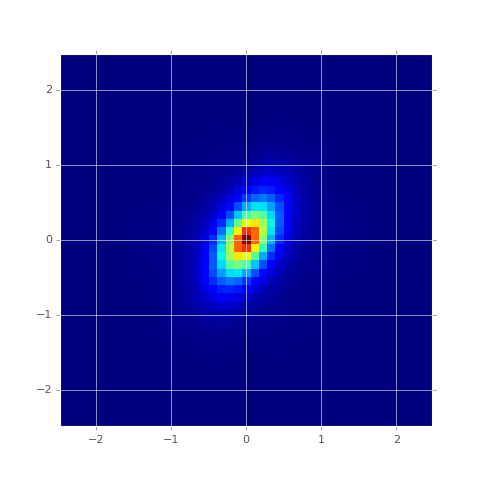

In [3]:
plt.figure(figsize=(6, 6))
t = report_dict['transform']
if report_dict['information']['calc_type'] == 'image':
    xmin = t['x_min'] 
    xmax = t['x_max']
    aspect = 1.0
else:
    xmin = t['wave_min']
    xmax = t['wave_max']
    aspect = 0.75
ymin = t['y_min']
ymax = t['y_max']
extent = [xmin, xmax, ymin, ymax]
implot = plt.imshow(report_dict['2d']['snr'],
                    interpolation='nearest',
                    extent=extent,
                    aspect=aspect*(xmax-xmin)/(ymax-ymin))
plt.show()

In [4]:
calc_input

{'background': 'low',
 'calculation': {'effects': {'background': True,
   'ipc': True,
   'saturation': True},
  'noise': {'crs': False,
   'darkcurrent': True,
   'ffnoise': True,
   'readnoise': True,
   'rn_correlation': True}},
 'configuration': {'detector': {'nexp': 1,
   'ngroup': 10,
   'nint': 1,
   'readmode': 'deep2',
   'subarray': 'full'},
  'dynamic_scene': True,
  'instrument': {'aperture': 'any',
   'disperser': None,
   'filter': 'z087',
   'instrument': 'wfirstimager',
   'mode': 'imaging'},
  'max_scene_size': 25.0,
  'scene_size': 5.0},
 'scene': [{'id': 1,
   'position': {'orientation': 60.0, 'x_offset': 0.0, 'y_offset': 0.0},
   'shape': {'geometry': 'sersic',
    'major': 0.2,
    'minor': 0.1,
    'sersic_index': 1.0},
   'spectrum': {'lines': [],
    'name': 'generic source',
    'normalization': {'norm_flux': 0.01,
     'norm_fluxunit': 'mjy',
     'norm_wave': 2.0,
     'norm_waveunit': 'microns',
     'type': 'at_lambda'},
    'sed': {'sed_type': 'flat', 'uni

In [6]:
write_json(calc_input, "wfirst_imager.json")